In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset to examine its contents and structure
file_path = '/content/flood_risk_dataset_india.csv'
data = pd.read_csv(file_path)

# Display the first few rows and general information to understand the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

(    Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
 0  18.861663  78.835584     218.999493         34.144337     43.912963   
 1  35.570715  77.654451      55.353599         28.778774     27.585422   
 2  29.227824  73.108463     103.991908         43.934956     30.108738   
 3  25.361096  85.610733     198.984191         21.569354     34.453690   
 4  12.524541  81.822101     144.626803         32.635692     36.292267   
 
    River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
 0             4236.182888         7.415552     377.465433    Water Body   
 1             2472.585219         8.811019    7330.608875        Forest   
 2              977.328053         4.631799    2205.873488  Agricultural   
 3             3683.208933         2.891787    2512.277800        Desert   
 4             2093.390678         3.188466    2001.818223  Agricultural   
 
   Soil Type  Population Density  Infrastructure  Historical Floods  \
 0      Clay       

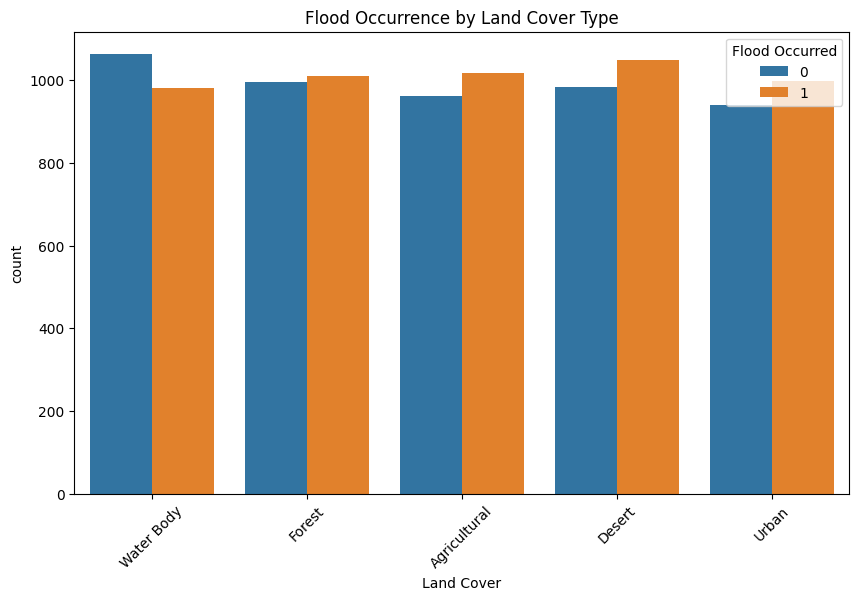

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from IPython.display import display


# 3. Flood Occurrence by Land Cover Type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Land Cover', hue='Flood Occurred')
plt.title('Flood Occurrence by Land Cover Type')
plt.xticks(rotation=45)
plt.show()




In [14]:
# Geospatial Visualization of Flood Occurrences
# Initialize the map centered on the average latitude and longitude
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=5)

# Use MarkerCluster for a cleaner look if there are many points
marker_cluster = MarkerCluster().add_to(m)

# Add points for each row in the dataset
for _, row in data.iterrows():
    color = 'red' if row['Flood Occurred'] == 1 else 'blue'
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius=2,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Display the map in the notebook
display(m)


<ipython-input-15-bde3ae0ebedf>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data.groupby(['Rainfall_bin', 'Water_Level_bin'])['Flood Occurred'].mean().unstack()


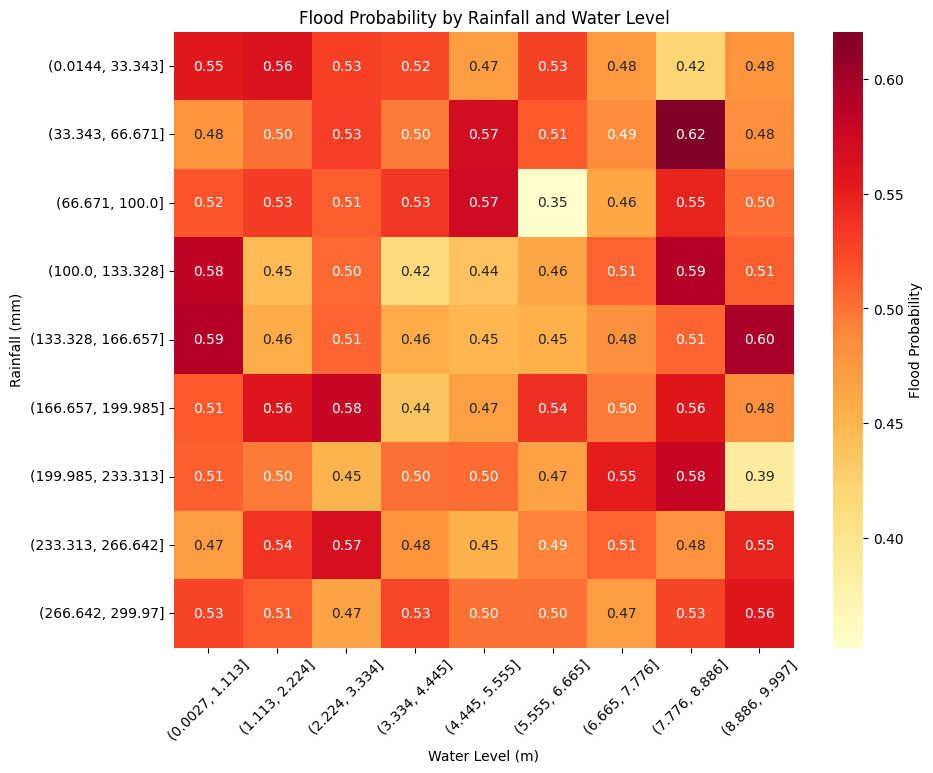

In [15]:
# Define bin edges for Rainfall and Water Level
rainfall_bins = np.linspace(data['Rainfall (mm)'].min(), data['Rainfall (mm)'].max(), 10)
water_level_bins = np.linspace(data['Water Level (m)'].min(), data['Water Level (m)'].max(), 10)

# Bin data
data['Rainfall_bin'] = pd.cut(data['Rainfall (mm)'], bins=rainfall_bins)
data['Water_Level_bin'] = pd.cut(data['Water Level (m)'], bins=water_level_bins)

# Calculate flood probability per bin
heatmap_data = data.groupby(['Rainfall_bin', 'Water_Level_bin'])['Flood Occurred'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".2f", cbar_kws={'label': 'Flood Probability'})
plt.title("Flood Probability by Rainfall and Water Level")
plt.xlabel("Water Level (m)")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


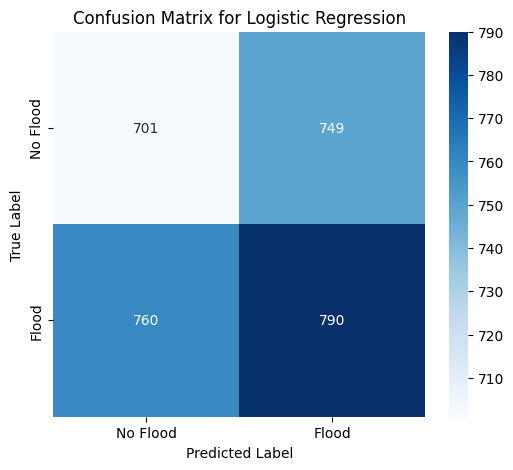

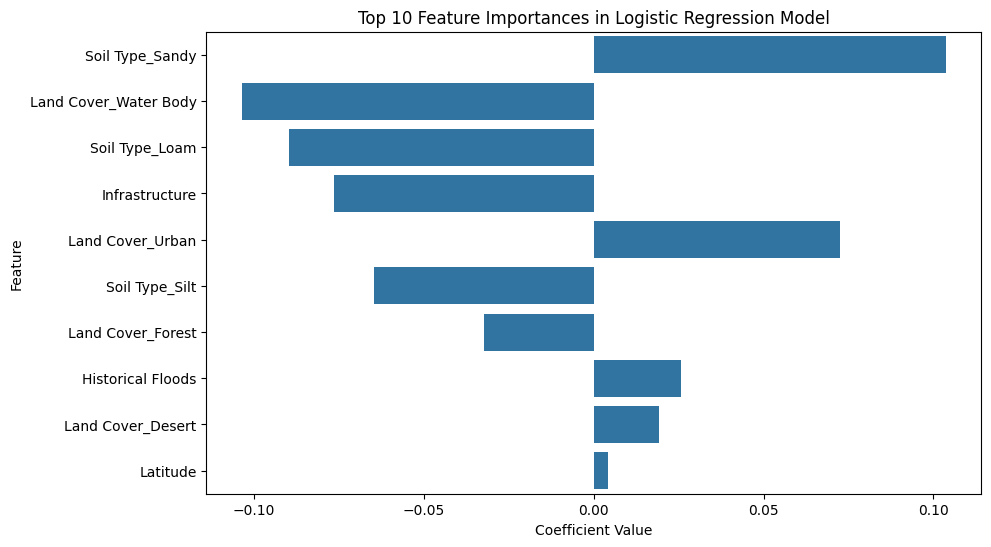

In [ ]:
# Re-import pandas and reload the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preprocess the data by encoding categorical variables
df_encoded = pd.get_dummies(data, columns=["Land Cover", "Soil Type"], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=["Flood Occurred"])
y = df_encoded["Flood Occurred"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy, classification report, and confusion matrix
accuracy, classification_rep, conf_matrix

# Visualizations

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Feature Importance based on logistic regression coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": log_reg.coef_[0]})
coefficients = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients.head(10))  # Show top 10 features
plt.title("Top 10 Feature Importances in Logistic Regression Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Print the accuracy, classification report, and confusion matrix for the logistic regression model

print("Logistic Regression Model Performance")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Logistic Regression Model Performance
Accuracy: 0.497

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48      1450
           1       0.51      0.51      0.51      1550

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000


Confusion Matrix:
 [[701 749]
 [760 790]]
